In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse 
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\CoffeeML1.csv", parse_dates =["timestamp"])

count_row = df.shape[0]  # gives number of row count
count_column = df.shape[1] # gives number of column count

print('Number of rows: {}'.format(count_row))
print('Number of columns: {}'.format(count_column))

df.head()

Number of rows: 13588472
Number of columns: 11


,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
0,2020-07-16 00:00:00.024000+00:00,NaN,NaN,12.0,NaN,17.0,NaN,NaN,NaN,15091.0,NaN
1,2020-07-16 00:00:00.026000+00:00,1548.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
2,2020-07-16 00:00:00.134000+00:00,NaN,NaN,3.0,NaN,11.0,NaN,NaN,NaN,14695.0,NaN
3,2020-07-16 00:00:00.135000+00:00,1550.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
4,2020-07-16 00:00:00.236000+00:00,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,15082.0,NaN


In [3]:
#data_0 = df1.drop(df1['2020-07-16 00:00:00':'2020-07-16 07:50:00'].index)
df['timestamp'] = pd.to_datetime(df['timestamp'])
startDate=['2020-07-16 05:00:00','2020-07-17 05:00:00','2020-07-18 05:00:00','2020-07-19 05:00:00','2020-07-20 05:00:00','2020-07-21 05:00:00','2020-07-22 05:00:00']
endDate=['2020-07-16 17:00:00','2020-07-17 17:00:00','2020-07-18 17:00:00','2020-07-19 17:00:00','2020-07-20 17:00:00','2020-07-21 17:00:00','2020-07-22 17:00:00']
#data_0[data_0.timestamp<endDate & startDate]
#df[df['timestamp']>= startDate & df ['timestamp']<= endDate]
result = []
for i in  range(0, len(startDate)) :
    start = startDate[i]
    end = endDate[i]
    result.append((df['timestamp'] > start) & (df['timestamp'] <= end)) 

resultDf = []
for item in result:
    if len(item)>0:
        resultDf.append(df.loc[item])

merged_df = pd.concat(resultDf)
merged_df

,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
404347,2020-07-16 05:00:00.004000+00:00,NaN,NaN,3.0,NaN,11.0,NaN,NaN,NaN,12323.0,NaN
404348,2020-07-16 05:00:00.005000+00:00,1545.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
404349,2020-07-16 05:00:00.115000+00:00,NaN,NaN,7.0,NaN,11.0,NaN,NaN,NaN,13651.0,NaN
404350,2020-07-16 05:00:00.116000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
404351,2020-07-16 05:00:00.216000+00:00,NaN,NaN,4.0,NaN,9.0,NaN,NaN,NaN,14924.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13021748,2020-07-22 16:59:59.772000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
13021749,2020-07-22 16:59:59.872000+00:00,NaN,NaN,1.0,NaN,9.0,NaN,NaN,NaN,14843.0,NaN
13021750,2020-07-22 16:59:59.880000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
13021751,2020-07-22 16:59:59.991000+00:00,NaN,NaN,18.0,NaN,19.0,NaN,NaN,NaN,14696.0,NaN


In [4]:
df2= merged_df.set_index('timestamp')
df2.head()

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
timestamp,,,,,,,,,,
2020-07-16 05:00:00.004000+00:00,NaN,NaN,3.0,NaN,11.0,NaN,NaN,NaN,12323.0,NaN
2020-07-16 05:00:00.005000+00:00,1545.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
2020-07-16 05:00:00.115000+00:00,NaN,NaN,7.0,NaN,11.0,NaN,NaN,NaN,13651.0,NaN
2020-07-16 05:00:00.116000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
2020-07-16 05:00:00.216000+00:00,NaN,NaN,4.0,NaN,9.0,NaN,NaN,NaN,14924.0,NaN


In [5]:
df2.index

DatetimeIndex(['2020-07-16 05:00:00.004000+00:00',
               '2020-07-16 05:00:00.005000+00:00',
               '2020-07-16 05:00:00.115000+00:00',
               '2020-07-16 05:00:00.116000+00:00',
               '2020-07-16 05:00:00.216000+00:00',
               '2020-07-16 05:00:00.224000+00:00',
               '2020-07-16 05:00:00.334000+00:00',
               '2020-07-16 05:00:00.335000+00:00',
               '2020-07-16 05:00:00.436000+00:00',
               '2020-07-16 05:00:00.445000+00:00',
               ...
               '2020-07-22 16:59:59.550000+00:00',
               '2020-07-22 16:59:59.551000+00:00',
               '2020-07-22 16:59:59.660000+00:00',
               '2020-07-22 16:59:59.661000+00:00',
               '2020-07-22 16:59:59.771000+00:00',
               '2020-07-22 16:59:59.772000+00:00',
               '2020-07-22 16:59:59.872000+00:00',
               '2020-07-22 16:59:59.880000+00:00',
               '2020-07-22 16:59:59.991000+00:00',
            

In [6]:
X, y = df2.drop(['Keypad.keyPressed'], axis=1), df2['Keypad.keyPressed']
X

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal
timestamp,,,,,,,,,
2020-07-16 05:00:00.004000+00:00,NaN,NaN,3.0,NaN,11.0,NaN,NaN,NaN,12323.0
2020-07-16 05:00:00.005000+00:00,1545.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN
2020-07-16 05:00:00.115000+00:00,NaN,NaN,7.0,NaN,11.0,NaN,NaN,NaN,13651.0
2020-07-16 05:00:00.116000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN
2020-07-16 05:00:00.216000+00:00,NaN,NaN,4.0,NaN,9.0,NaN,NaN,NaN,14924.0
...,...,...,...,...,...,...,...,...,...
2020-07-22 16:59:59.772000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-07-22 16:59:59.872000+00:00,NaN,NaN,1.0,NaN,9.0,NaN,NaN,NaN,14843.0
2020-07-22 16:59:59.880000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN


In [7]:
X1 = X.interpolate(method='time', axis=0).ffill().bfill()
X1

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal
timestamp,,,,,,,,,
2020-07-16 05:00:00.004000+00:00,1545.000000,41.9375,3.000000,29.34375,11.000000,0.0,2.000000,1.0,12323.000000
2020-07-16 05:00:00.005000+00:00,1545.000000,41.9375,3.036034,29.34375,11.000000,0.0,2.000000,1.0,12334.963191
2020-07-16 05:00:00.115000+00:00,1555.900907,41.9375,7.000000,29.34375,11.000000,0.0,2.000000,1.0,13651.000000
2020-07-16 05:00:00.116000+00:00,1556.000000,41.9375,6.970299,29.34375,10.980199,0.0,2.000000,1.0,13663.603162
2020-07-16 05:00:00.216000+00:00,1550.444444,41.9375,4.000000,29.34375,9.000000,0.0,2.000000,1.0,14924.000000
...,...,...,...,...,...,...,...,...,...
2020-07-22 16:59:59.772000+00:00,1578.789004,36.8750,30.702989,30.12500,30.782192,0.0,1.009174,1.0,14957.851558
2020-07-22 16:59:59.872000+00:00,1557.688074,36.8750,1.000000,30.12500,9.000000,0.0,1.926605,1.0,14843.000000
2020-07-22 16:59:59.880000+00:00,1556.000000,36.8750,2.142857,30.12500,9.672269,0.0,2.000000,1.0,14833.117652


In [8]:
X1.mean()

AnalogVibrationSensor.vibrationTotal            1560.506470
TemperatureAndHumiditySensor.humidity             43.411162
AnalogNoiseSensor.noiseDiff                        8.201137
TemperatureAndHumiditySensor.temperature          30.342110
AnalogNoiseSensor.noiseRange                      12.488850
AnalogVibrationSensor.vibrationDiff                0.187916
AnalogVibrationSensor.vibrationRange               1.959078
VibrationThresholdSensor.vibrationThreshold        0.999648
AnalogNoiseSensor.noiseTotal                   14556.346861
dtype: float64

In [9]:
merged_df1 = pd.concat([X1, y], axis=1)
merged_df1

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
timestamp,,,,,,,,,,
2020-07-16 05:00:00.004000+00:00,1545.000000,41.9375,3.000000,29.34375,11.000000,0.0,2.000000,1.0,12323.000000,NaN
2020-07-16 05:00:00.005000+00:00,1545.000000,41.9375,3.036034,29.34375,11.000000,0.0,2.000000,1.0,12334.963191,NaN
2020-07-16 05:00:00.115000+00:00,1555.900907,41.9375,7.000000,29.34375,11.000000,0.0,2.000000,1.0,13651.000000,NaN
2020-07-16 05:00:00.116000+00:00,1556.000000,41.9375,6.970299,29.34375,10.980199,0.0,2.000000,1.0,13663.603162,NaN
2020-07-16 05:00:00.216000+00:00,1550.444444,41.9375,4.000000,29.34375,9.000000,0.0,2.000000,1.0,14924.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-22 16:59:59.772000+00:00,1578.789004,36.8750,30.702989,30.12500,30.782192,0.0,1.009174,1.0,14957.851558,NaN
2020-07-22 16:59:59.872000+00:00,1557.688074,36.8750,1.000000,30.12500,9.000000,0.0,1.926605,1.0,14843.000000,NaN
2020-07-22 16:59:59.880000+00:00,1556.000000,36.8750,2.142857,30.12500,9.672269,0.0,2.000000,1.0,14833.117652,NaN


In [42]:
df25 = merged_df1[merged_df1["Keypad.keyPressed"].notna()]
df25.head(20)

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
timestamp,,,,,,,,,,
2020-07-16 05:36:05.336000+00:00,1542.255819,42.375000,10.876931,29.343750,14.000000,0.000000,2.023256,1.000000,14905.554126,1.0
2020-07-16 05:36:05.387000+00:00,1550.000010,42.375000,11.960787,29.343750,13.519607,0.000000,2.000000,1.000000,14984.460983,1.0
2020-07-16 05:36:05.437000+00:00,1558.333332,42.375000,12.941175,29.343750,13.029412,0.000000,2.000000,1.000000,15060.441085,1.0
2020-07-16 05:36:05.488000+00:00,1555.119268,42.375000,8.764711,29.343750,10.777778,0.000000,2.000000,1.000000,14910.647253,1.0
2020-07-16 05:36:05.538000+00:00,1550.990845,42.375000,4.352963,29.343750,8.462969,0.000000,2.000000,1.000000,14749.863552,1.0
2020-07-16 05:36:05.589000+00:00,1553.441164,42.375000,4.862382,29.343750,11.980574,0.000000,2.000000,1.000000,15403.621521,1.0
2020-07-16 05:36:05.639000+00:00,1557.852945,42.375000,5.779816,29.343750,16.834952,0.000000,2.000000,1.000000,16112.798065,1.0
2020-07-16 05:36:05.691000+00:00,1554.626164,42.372117,4.039213,29.344471,14.470584,0.000000,2.000000,1.000000,15900.646579,1.0
2020-07-16 05:36:05.742000+00:00,1548.906534,42.361614,1.539207,29.347096,9.970573,0.000000,2.000000,1.000000,15413.145355,1.0


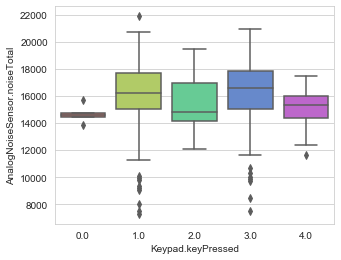

In [43]:
import seaborn as sb
sb.boxplot(x='Keypad.keyPressed', y='AnalogNoiseSensor.noiseTotal', data=merged_df1, palette='hls')

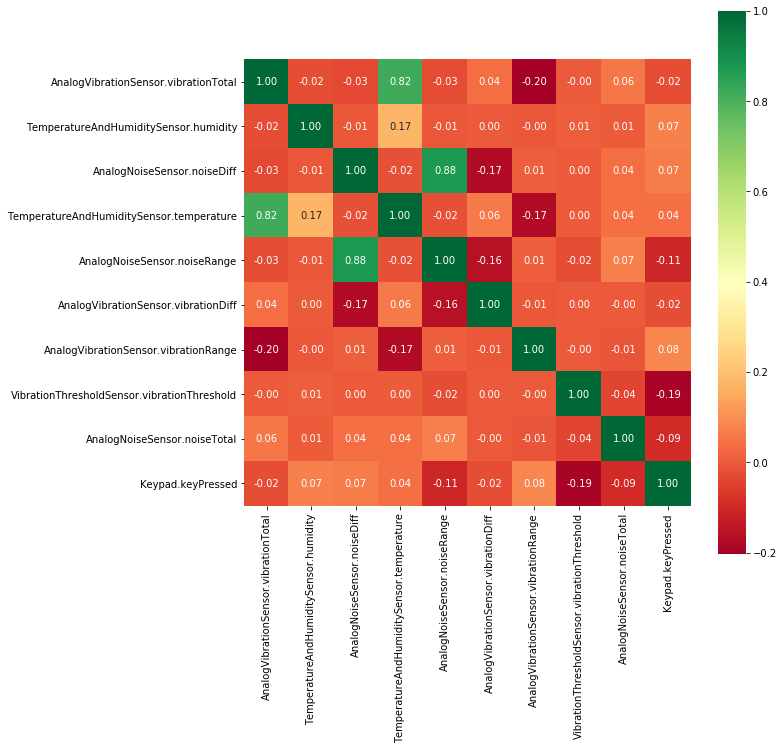

In [11]:
plt.figure(figsize=(10,10))
p=sns.heatmap(merged_df1.corr(), annot=True,cmap='RdYlGn',square=True, fmt='.2f')

# Segmenting the data into different periods with respect to the brewing 

In [12]:
test_df = merged_df1[["Keypad.keyPressed" ,"AnalogNoiseSensor.noiseTotal"]]

new_lines = []

columns_names = ["Keypad_keyPressed" ,"mean_noise_total"]

 

n = 460

# loop to the end of the frame with a skip of n 
for i in range(0, len(test_df), n):
    # to test if not yet at the end of the list
    if i < len(test_df) - n:
        
        # select all the keypad value from pos i to pos i+n
        all_keypad_pressed = test_df.iloc[i : i + n]["Keypad.keyPressed"]
        key_value = None
        
        # stop searching once we hit a non empty value
        for key in all_keypad_pressed:
            # if the key is not empty
            if key:
                key_value = key
                break
        # data to be inserted in the dataframe
        new_lines.append([ key_value, test_df.iloc[i : i+n]["AnalogNoiseSensor.noiseTotal"].mean()])
    else:
        # select all the entry for the variable Keypad.keyPressed from pos i to the end 
        all_keypad_pressed = test_df.iloc[i:]["Keypad.keyPressed"]
        key_value = None
        for key in all_keypad_pressed:
            if key:
                key_value = key
                break
        new_lines.append([ key_value, test_df.iloc[i : ]["AnalogNoiseSensor.noiseTotal"].mean()])
        
new_df = pd.DataFrame(new_lines, columns=columns_names)

In [13]:
new_df

,Keypad_keyPressed,mean_noise_total
0,NaN,14356.048138
1,NaN,14449.833374
2,NaN,14478.980205
3,NaN,14455.572888
4,NaN,14550.393104
...,...,...
14769,NaN,14542.175717
14770,NaN,14459.601103
14771,NaN,14518.431254
14772,NaN,14618.533374


In [14]:
df25 = new_df[new_df["Keypad_keyPressed"].notna()]
df25

,Keypad_keyPressed,mean_noise_total
12802,3.0,15241.495755
12817,3.0,14666.567151
12829,1.0,15256.294498
12970,2.0,14755.496918
13013,3.0,15124.227508
13187,1.0,14858.777646


In [15]:
df26 = new_df[new_df["Keypad_keyPressed"].isna()]
df26

,Keypad_keyPressed,mean_noise_total
0,NaN,14356.048138
1,NaN,14449.833374
2,NaN,14478.980205
3,NaN,14455.572888
4,NaN,14550.393104
...,...,...
14769,NaN,14542.175717
14770,NaN,14459.601103
14771,NaN,14518.431254
14772,NaN,14618.533374


In [16]:
rr=df25['Keypad_keyPressed'].value_counts()
rr

3.0    3
1.0    2
2.0    1
Name: Keypad_keyPressed, dtype: int64

In [17]:
df35 = new_df[(new_df['mean_noise_total']>15000)& (new_df["Keypad_keyPressed"].isna())]
df35

,Keypad_keyPressed,mean_noise_total
105,NaN,15450.243262
134,NaN,15385.817803
144,NaN,15654.924218
180,NaN,15344.500132
218,NaN,15531.480010
...,...,...
14207,NaN,15640.397032
14265,NaN,15582.288702
14314,NaN,15417.146473
14315,NaN,15254.069649


In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

In [19]:
st, y = new_df.drop(['Keypad_keyPressed'], axis=1),new_df['Keypad_keyPressed']
st

,mean_noise_total
0,14356.048138
1,14449.833374
2,14478.980205
3,14455.572888
4,14550.393104
...,...
14769,14542.175717
14770,14459.601103
14771,14518.431254
14772,14618.533374


In [20]:
sts = st.iloc[:,:].values
sts[:,0]

array([14356.0481378 , 14449.83337411, 14478.9802046 , ...,
       14518.43125414, 14618.53337372, 14515.68252194])

# CLUSTERING Create Linkage Matrix

In [21]:
Z = linkage(sts, 'ward')

Plot Dendrogram of Clusters

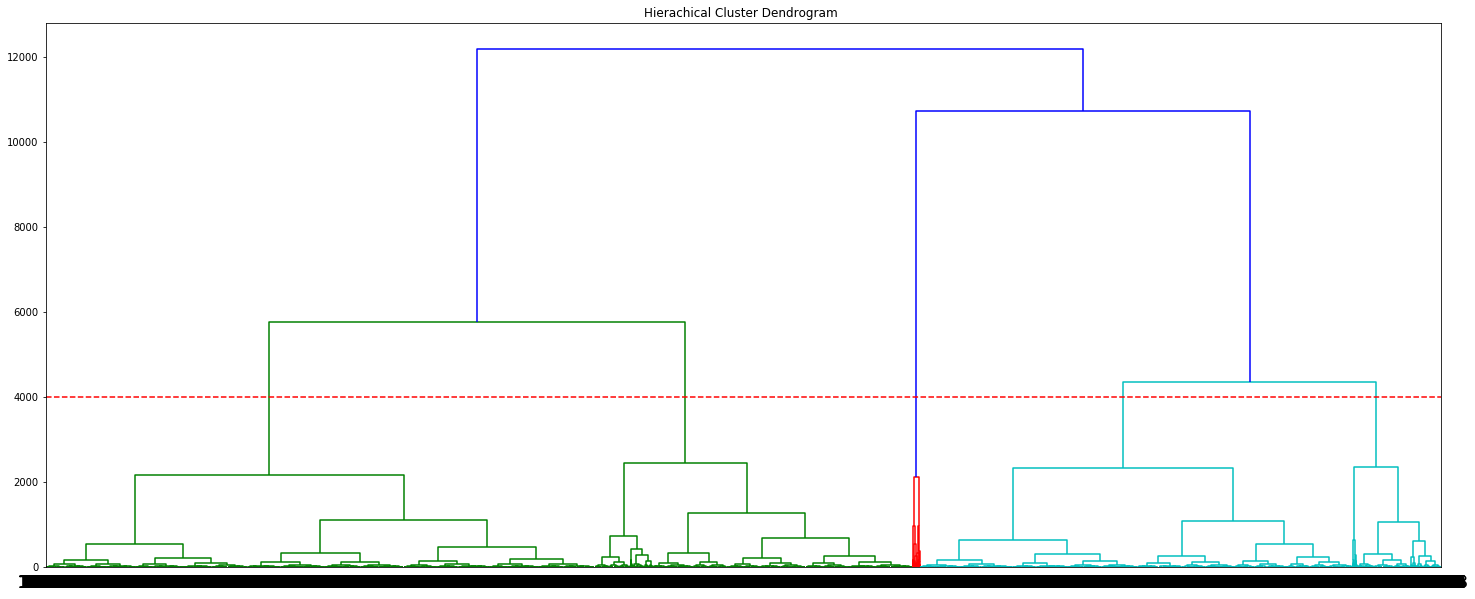

In [22]:
plt.figure(figsize = (25, 10))
plt.title('Hierachical Cluster Dendrogram ')
plt.axhline(y=4000, color='r', linestyle='--')
#plt.ylabel('distance')
dendrogram(
    Z,
    labels = st.index,
    leaf_rotation = 0.,
    leaf_font_size = 18.,
)
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(sts)

array([0, 0, 0, ..., 3, 4, 3], dtype=int64)

In [ ]:
# ac2 = AgglomerativeClustering(n_clusters = 5) 
  
# # Visualizing the clustering 
# plt.figure(figsize =(6, 6)) 
# plt.scatter(sts['mean_noise_total'], sts['Keypad_keyPressed'],  
#            c = ac2.fit_predict(st), cmap ='rainbow') 
# plt.show() 

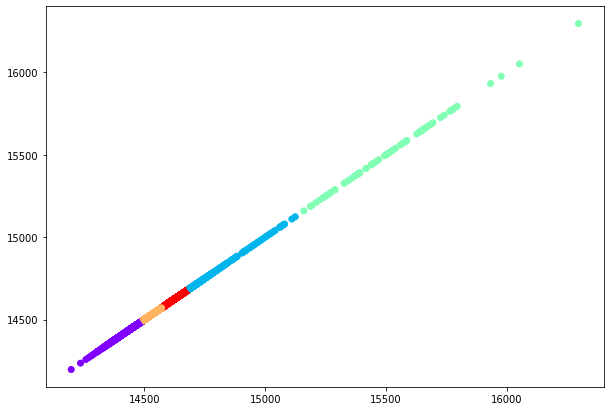

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(sts[:,0], sts[:,0], c=cluster.labels_, cmap='rainbow')

# Assigned labelled column from k means clustering in Azure

In [26]:
d = pd.read_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\K - Means Clustering_20_final.csv")

count_row = d.shape[0]  # gives number of row count
count_column = d.shape[1] # gives number of column count

print('Number of rows: {}'.format(count_row))
print('Number of columns: {}'.format(count_column))

d.head()

Number of rows: 14774
Number of columns: 7


,mean_noise_total,Assignments,DistancesToClusterCenter no.0,DistancesToClusterCenter no.1,DistancesToClusterCenter no.2,DistancesToClusterCenter no.3,DistancesToClusterCenter no.4
0,14356.048138,4,197.816406,1224.383789,658.079102,299.092773,100.710938
1,14449.833374,4,104.031250,1130.598633,564.293945,205.307617,6.925781
2,14478.980205,4,74.883789,1101.451172,535.146484,176.160156,22.221680
3,14455.572888,4,98.291016,1124.858398,558.553711,199.567383,1.185547
4,14550.393104,0,3.470703,1030.038086,463.733398,104.747070,93.634766


In [27]:
dX = d.drop(['DistancesToClusterCenter no.0','DistancesToClusterCenter no.1','DistancesToClusterCenter no.2','DistancesToClusterCenter no.3','DistancesToClusterCenter no.4'], axis=1)
dX

,mean_noise_total,Assignments
0,14356.048138,4
1,14449.833374,4
2,14478.980205,4
3,14455.572888,4
4,14550.393104,0
...,...,...
14769,14542.175717,0
14770,14459.601103,4
14771,14518.431254,0
14772,14618.533374,3


In [28]:
dX1, dy1 = dX.drop(['Assignments'], axis=1), dX['Assignments']
dX1

,mean_noise_total
0,14356.048138
1,14449.833374
2,14478.980205
3,14455.572888
4,14550.393104
...,...
14769,14542.175717
14770,14459.601103
14771,14518.431254
14772,14618.533374


# NORMALIZATION

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()

# Optionnal
X = pd.DataFrame(scaler.fit_transform(dX1), index=dX1.index, columns=dX1.columns)
X

,mean_noise_total
0,0.075770
1,0.120436
2,0.134318
3,0.123170
4,0.168329
...,...
14769,0.164416
14770,0.125088
14771,0.153107
14772,0.200782


# SPLIT Train/Test

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, dy1, test_size=0.3, random_state=123)

# Logistic Regression

Train set accuracy: 0.85
Test set accuracy: 0.84


Confusion matrix:
 [[2017    0    0    0    0]
 [   0    0    0   24    0]
 [   0    0    0   18    0]
 [ 473    0    0  619    0]
 [ 179    0    0    0 1103]]


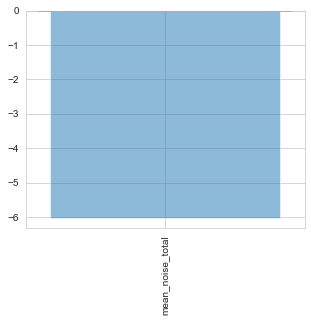

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1)

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
#print('Test set predictions: {}'.format(preds))
#print('\n')

#print('Train set accuracy: {:.2f}'.format(accuracy_score(y_train, clf.predict(X_train))))
#print('Test set accuracy: {:.2f}'.format(accuracy_score(y_test, clf.predict(X_test))))
print('Train set accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
print('\n')

confusion = confusion_matrix(y_test, preds)

print('Confusion matrix:\n', confusion)

plt.bar(range(X_train.shape[1]), clf.coef_[0], align = 'center', alpha = 0.5)
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [56]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 4], dtype=int64)

# Model Evaluation
#Classification report without cross-validation

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2017
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        18
           3       0.93      0.52      0.67      1092
           4       1.00      0.84      0.91      1282

    accuracy                           0.82      4433
   macro avg       0.53      0.47      0.48      4433
weighted avg       0.85      0.82      0.81      4433



C:\Users\arrah\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-fold cross-validation & confusion matrices

In [60]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[4742,    0,    0,    0,    0],
       [   0,    0,    0,   37,    0],
       [   0,    0,    0,   47,    0],
       [1268,    0,    0, 1220,    0],
       [ 657,    0,    0,    0, 2370]], dtype=int64)

In [ ]:
precision_score(y_train, y_train_pred)

In [62]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 32).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [63]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
cm

array([[2017,    0,    0,    0,    0],
       [   0,   24,    0,    0,    0],
       [   0,    0,   18,    0,    0],
       [   0,    0,    0, 1092,    0],
       [   0,    0,    0,    0, 1282]], dtype=int64)

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=11)

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
#print('Test set predictions: {}'.format(preds))
#print('\n')

#print('Train set accuracy: {:.2f}'.format(accuracy_score(y_train, clf.predict(X_train))))
#print('Test set accuracy: {:.2f}'.format(accuracy_score(y_test, clf.predict(X_test))))
print('Train set accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
print('\n')

confusion = confusion_matrix(y_test, preds)

print('Confusion matrix:\n', confusion)

Train set accuracy: 1.00
Test set accuracy: 0.99


Confusion matrix:
 [[2017    0    0    0    0]
 [   0    0   24    0    0]
 [   0    0   18    0    0]
 [   0    0    0 1092    0]
 [   0    0    0    0 1282]]


# Neural Network

### Scikit-learn implementation

In [65]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3)

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
#print('Test set predictions: {}'.format(preds))
#print('\n')

#print('Train set accuracy: {:.2f}'.format(accuracy_score(y_train, clf.predict(X_train))))
#print('Test set accuracy: {:.2f}'.format(accuracy_score(y_test, clf.predict(X_test))))
print('Train set accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
print('\n')

confusion = confusion_matrix(y_test, preds)

print('Confusion matrix:\n', confusion)

Train set accuracy: 0.95
Test set accuracy: 0.94


Confusion matrix:
 [[1798    0    0  167   52]
 [   0    0    0   24    0]
 [   0    0    0   18    0]
 [   0    0    0 1092    0]
 [   0    0    0    0 1282]]


In [66]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
#print('Test set predictions: {}'.format(preds))
#print('\n')

#print('Train set accuracy: {:.2f}'.format(accuracy_score(y_train, clf.predict(X_train))))
#print('Test set accuracy: {:.2f}'.format(accuracy_score(y_test, clf.predict(X_test))))
print('Train set accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
print('\n')

confusion = confusion_matrix(y_test, preds)

print('Confusion matrix:\n', confusion)

Train set accuracy: 0.99
Test set accuracy: 0.99


Confusion matrix:
 [[2017    0    0    0    0]
 [   0   24    0    0    0]
 [   0    0   18    0    0]
 [  17    0   11 1064    0]
 [   8    0    0    0 1274]]


# Train models
## k-NN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

n = 5

clf = KNeighborsClassifier(n)

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print('Test set predictions: {}'.format(preds))
print('\n')

#print('Train set accuracy: {:.2f}'.format(accuracy_score(y_train, clf.predict(X_train))))
#print('Test set accuracy: {:.2f}'.format(accuracy_score(y_test, clf.predict(X_test))))
print('Train set accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
print('\n')

confusion = confusion_matrix(y_test, preds)

print('Confusion matrix:\n', confusion)

Test set predictions: [3 0 0 ... 0 0 4]


Train set accuracy: 1.00
Test set accuracy: 1.00


Confusion matrix:
 [[2017    0    0    0    0]
 [   0   24    0    0    0]
 [   0    0   18    0    0]
 [   0    0    3 1089    0]
 [   0    0    0    0 1282]]


# Find the best value for _n_

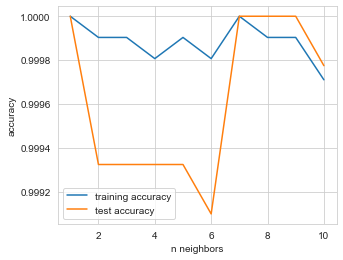

In [69]:
training_accuracy = []
test_accuracy = []

n_range = range(1, 11)

for n in n_range:
    clf = KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(n_range, training_accuracy, label='training accuracy')
plt.plot(n_range, test_accuracy, label='test accuracy')
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.legend()

# Linear SVM

Train set accuracy: 0.92
Test set accuracy: 0.91


Confusion matrix:
 [[2017    0    0    0    0]
 [   0   24    0    0    0]
 [   0    0    3   15    0]
 [ 221    0    0  871    0]
 [ 144    0    0    0 1138]]


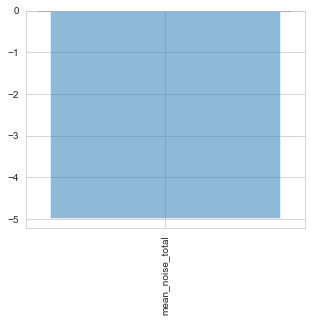

In [75]:
# from sklearn.svm import SVC

clf = SVC(kernel="linear", C=1)

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
#print('Test set predictions: {}'.format(preds))
#print('\n')

#print('Train set accuracy: {:.2f}'.format(accuracy_score(y_train, clf.predict(X_train))))
#print('Test set accuracy: {:.2f}'.format(accuracy_score(y_test, clf.predict(X_test))))
print('Train set accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
print('\n')

confusion = confusion_matrix(y_test, preds)

print('Confusion matrix:\n', confusion)

plt.bar(range(X_train.shape[1]), clf.coef_[0], align = 'center', alpha = 0.5)
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])

# Find the best value of C

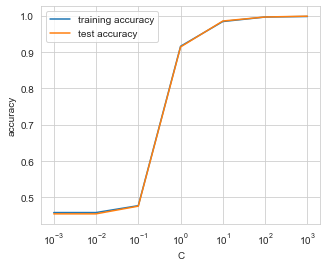

In [71]:
training_accuracy = []
test_accuracy = []

C_range = np.logspace(-3, 3, num=7)

for C in C_range:
    clf = SVC(kernel="linear", C=C)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(C_range, training_accuracy, label='training accuracy')
plt.plot(C_range, test_accuracy, label='test accuracy')
plt.xlabel('C')
plt.xscale("log")
plt.ylabel('accuracy')
plt.legend()